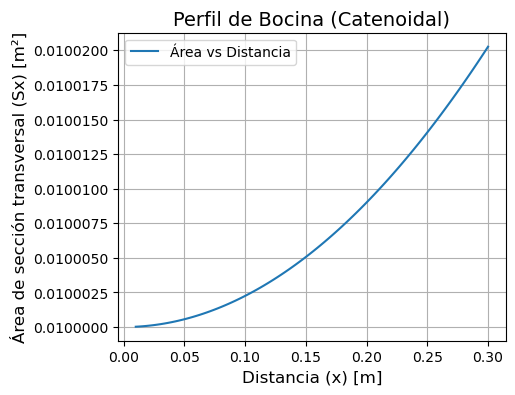

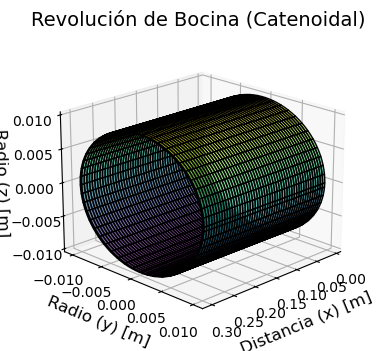

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tkinter as tk
from tkinter import ttk, messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Funciones para calcular el área de cada tipo de bocina
def bocina_conica(x, ST, x0):
    return ST * (x / x0)**2

def bocina_catenoidal(x, ST, m):
    return ST * (np.cosh((m * x) / 2))**2

def bocina_hiperbolica(x, ST, m, M):
    return ST * (np.cosh((m * x) / 2) + M * np.sinh((m * x) / 2))**2

def bocina_exponencial(x, ST, m):
    return ST * np.exp(m * x)

# Función para graficar
def graficar_bocina():
    try:
        tipo = tipo_bocina.get()
        ST = float(entry_ST.get())
        longitud = float(entry_longitud.get())

        x = np.linspace(0.01, longitud, 100)  # Valores de x para todas las gráficas

        # Seleccionar el perfil basado en el tipo de bocina
        if tipo == 'Cónica':
            x0 = float(entry_x0.get())
            perfil = bocina_conica(x, ST, x0)
        elif tipo == 'Catenoidal':
            m = float(entry_m.get())
            perfil = bocina_catenoidal(x, ST, m)
        elif tipo == 'Hiperbólica':
            m = float(entry_m.get())
            M = float(entry_M.get())
            perfil = bocina_hiperbolica(x, ST, m, M)
        elif tipo == 'Exponencial':
            m = float(entry_m.get())
            perfil = bocina_exponencial(x, ST, m)
        else:
            messagebox.showerror("Error", "Seleccione un tipo de bocina válido.")
            return

        # Actualizar la gráfica del perfil
        ax1.clear()
        ax1.plot(x, perfil, label="Área vs Distancia")
        ax1.set_title(f'Perfil de Bocina ({tipo})', fontsize=14)
        ax1.set_xlabel('Distancia (x) [m]', fontsize=12)
        ax1.set_ylabel('Área de sección transversal (Sx) [m²]', fontsize=12)
        ax1.tick_params(axis='both', labelsize=10)
        ax1.grid(True)
        ax1.legend(fontsize=10)
        canvas1.draw()

        # Actualizar la gráfica de revolución 3D
        ax2.clear()
        theta = np.linspace(0, 2 * np.pi, 100)
        X, Theta = np.meshgrid(x, theta)
        Y = perfil * np.cos(Theta)
        Z = perfil * np.sin(Theta)
        ax2.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.7)
        ax2.set_title(f'Revolución de Bocina ({tipo})', fontsize=14)
        ax2.set_xlabel('Distancia (x) [m]', fontsize=12)
        ax2.set_ylabel('Radio (y) [m]', fontsize=12)
        ax2.set_zlabel('Radio (z) [m]', fontsize=12)
        ax2.tick_params(axis='both', labelsize=10)
        ax2.view_init(elev=20, azim=45)  # Ajustar el ángulo de vista 3D
        canvas2.draw()

    except ValueError:
        messagebox.showerror("Error", "Por favor, ingrese valores válidos.")

# Crear la ventana principal
root = tk.Tk()
root.title("Graficador de Bocinas")

# Crear el marco izquierdo para entradas
frame_entradas = tk.Frame(root)
frame_entradas.pack(side=tk.LEFT, padx=10, pady=10)

# Crear el marco derecho para las gráficas
frame_graficas = tk.Frame(root)
frame_graficas.pack(side=tk.RIGHT, padx=10, pady=10)

# Tipo de bocina
ttk.Label(frame_entradas, text="Tipo de Bocina:").grid(column=0, row=0, padx=5, pady=5)
tipo_bocina = ttk.Combobox(frame_entradas, values=["Cónica", "Catenoidal", "Hiperbólica", "Exponencial"], state="readonly")
tipo_bocina.grid(column=1, row=0, padx=5, pady=5)

# Área en la garganta (ST)
ttk.Label(frame_entradas, text="Área en la garganta (ST) [m²]:").grid(column=0, row=1, padx=5, pady=5)
entry_ST = ttk.Entry(frame_entradas)
entry_ST.grid(column=1, row=1, padx=5, pady=5)

# Longitud
ttk.Label(frame_entradas, text="Longitud de la bocina [m]:").grid(column=0, row=2, padx=5, pady=5)
entry_longitud = ttk.Entry(frame_entradas)
entry_longitud.grid(column=1, row=2, padx=5, pady=5)

# Parámetros específicos
ttk.Label(frame_entradas, text="x0 [m] (solo Cónica):").grid(column=0, row=3, padx=5, pady=5)
entry_x0 = ttk.Entry(frame_entradas)
entry_x0.grid(column=1, row=3, padx=5, pady=5)

ttk.Label(frame_entradas, text="m [1/m] (Catenoidal, Hiperbólica, Exponencial):").grid(column=0, row=4, padx=5, pady=5)
entry_m = ttk.Entry(frame_entradas)
entry_m.grid(column=1, row=4, padx=5, pady=5)

ttk.Label(frame_entradas, text="M (Hiperbólica, 0 < M < 1):").grid(column=0, row=5, padx=5, pady=5)
entry_M = ttk.Entry(frame_entradas)
entry_M.grid(column=1, row=5, padx=5, pady=5)

# Botón de graficar
btn_graficar = ttk.Button(frame_entradas, text="Graficar", command=graficar_bocina)
btn_graficar.grid(column=0, row=6, columnspan=2, pady=10)

# Crear las figuras iniciales para los gráficos
fig1, ax1 = plt.subplots(figsize=(5, 4))
canvas1 = FigureCanvasTkAgg(fig1, master=frame_graficas)
canvas1.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

fig2 = plt.figure(figsize=(5, 4))
ax2 = fig2.add_subplot(111, projection='3d')
canvas2 = FigureCanvasTkAgg(fig2, master=frame_graficas)
canvas2.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

# Ejecutar la aplicación
root.mainloop()
